This implementation is motivated by the Machine Learning online class taught by Professor Andrew Ng.

I am implementing this example in the Julia programming language. I have prior experience working with Python and R and transition to Julia seems to be relatively straight forward. So, I am excited.

I watched the presentation that Alan Edelman (co-founder) did 
https://www.youtube.com/watch?v=rZS2LGiurKY&t=497s and that peaked my interest.

I also read - Why We Created Julia article in the 2012 blogpost. https://julialang.org/blog/2012/02/why-we-created-julia/

In [1]:
println("Linear regression - one variable - Predict profits for a food truck")

Linear regression - one variable - Predict profits for a food truck


We need to load following library modules into our environment to use a particular module or function. We use them at different stages of implementation, but I declared them at the top for clarity

In [3]:
using CSV
using DataFrames
using Plots
using ForwardDiff
using PlotlyJS
using WebIO

gr()
Plots.GRBackend()
Plots.gr() # I prefer the default GR backend 

Plots.GRBackend()

We can get a quick look at the data stored inside the ex1data1.csv file

In [4]:
;head ex1data1.csv

population,profit
6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987


Next, we load the data into the DataFrame using CSV.jl package:

https://csv.juliadata.org/stable/

In [7]:
C = CSV.read("ex1data1.csv", DataFrame)

,population,profit
,Float64,Float64
1,6.1101,17.592
2,5.5277,9.1302
3,8.5186,13.662
4,7.0032,11.854
5,5.8598,6.8233
6,8.3829,11.886
7,7.4764,4.3483
8,8.5781,12.0
9,6.4862,6.5987


The problem is posed as : You are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

**@show** — Prints one or more expressions, and their results, to stdout, and returns the last result.

In [8]:
@show typeof(C)
C[1:10, :]
C.profit
#C[!,:population]

typeof(C) = DataFrame


97-element Vector{Float64}:
 17.592
  9.1302
 13.662
 11.854
  6.8233
 11.886
  4.3483
 12.0
  6.5987
  3.8166
  3.2522
 15.505
  3.1551
  ⋮
  4.2415
  6.7981
  0.92695
  0.152
  2.8214
  1.8451
  4.2959
  7.2029
  1.9869
  0.14454
  9.0551
  0.61705

names function — Return a freshly allocated Vector{String} of names of columns contained in df.

https://dataframes.juliadata.org/stable/lib/functions/#Base.names

In [9]:
names(C)

2-element Vector{String}:
 "population"
 "profit"

Return descriptive statistics for a data frame as a new DataFrame where each row represents a variable and each column a summary statistic.

In [10]:
describe(C)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,population,8.1598,5.0269,6.5894,22.203,0,Float64
2,profit,5.83914,-2.6807,4.5623,24.147,0,Float64


In [11]:
C[1,:]

,population,profit
,Float64,Float64
1,6.1101,17.592


Get a data frame with the n first rows of df.

In [13]:
first(C, 10)

,population,profit
,Float64,Float64
1,6.1101,17.592
2,5.5277,9.1302
3,8.5186,13.662
4,7.0032,11.854
5,5.8598,6.8233
6,8.3829,11.886
7,7.4764,4.3483
8,8.5781,12.0
9,6.4862,6.5987


Get a data frame with the n last rows of df.

In [14]:
last(C, 3)

,population,profit
,Float64,Float64
1,8.2934,0.14454
2,13.394,9.0551
3,5.4369,0.61705


In [15]:
names(C)

2-element Vector{String}:
 "population"
 "profit"

Return a tuple containing the number of rows and columns of df. Optionally a dimension dim can be specified, where 1 corresponds to rows and 2 corresponds to columns.

In [20]:
size(C)

(97, 2)

### Broadcasting Operators and Functions

Broadcasting is also known as vectorization and we use the “dot” operator .

It also works with functions. 

In [22]:
[5, 10, 20] .+ 1

3-element Vector{Int64}:
  6
 11
 21

In [24]:
log.([2, 4, 6])

3-element Vector{Float64}:
 0.6931471805599453
 1.3862943611198906
 1.791759469228055

In [19]:
eltype.(eachcol(C))

2-element Vector{DataType}:
 Float64
 Float64

In [26]:
#C.population
#C[!, "population"] - ! in indexing is specific to DataFrames, and signals that you want a reference to the underlying vector storing the data, rather than a copy of it.
C[:, 1]

97-element Vector{Float64}:
  6.1101
  5.5277
  8.5186
  7.0032
  5.8598
  8.3829
  7.4764
  8.5781
  6.4862
  5.0546
  5.7107
 14.164
  5.734
  ⋮
  8.5172
  9.1802
  6.002
  5.5204
  5.0594
  5.7077
  7.6366
  5.8707
  5.3054
  8.2934
 13.394
  5.4369

In [27]:
loc=C.population .== 8.5781
C[loc, :]
#typeof(C[loc, :])
#C[loc, :].profit

,population,profit
,Float64,Float64
1,8.5781,12.0


Another way of achieving the same is to use a higher-order function such as **filter**. 

The filter function takes 2 arguments:
A function that takes an element of the array-like object as input and returns a boolean.
An array-like object (in our case a DataFrame) that we can iterate over.
For each row, filter will apply the function under 1. and when that function returns true we keep the row, otherwise, we throw it away:

The notation df -> df.population .== 8.5781 is a lambda (nameless) function

In [28]:
# typeof(filter(df -> df.population .== 8.5781, C))
filter(df -> df.population .== 8.5781, C)

,population,profit
,Float64,Float64
1,8.5781,12.0


In [29]:
filter(df -> df.population .== 8.5781, C).profit

1-element Vector{Float64}:
 12.0

**Plots.jl** is a plotting API and toolset in Julia

https://github.com/JuliaPlots

We want to use the data to help us select which city to expand to next.

A good step is to visualize the data. We create a scatter plot of the data using Plots.jl package

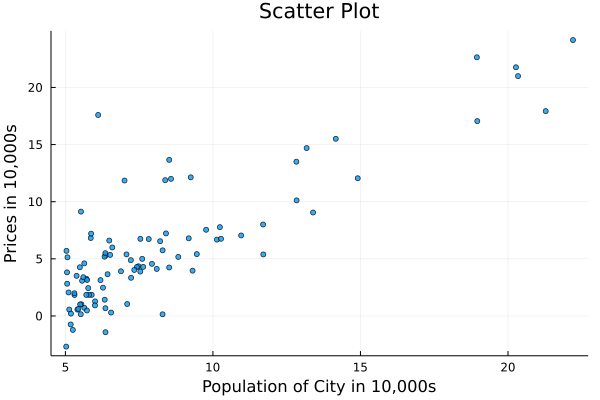

In [30]:
x = C.population
y = C.profit
gr()
Plots.plot(x, y, seriestype = :scatter, title = "Scatter Plot", markersize=3,
        alpha=.8,
        legend=false, 
        xlabel="Population of City in 10,000s",
        ylabel="Prices in 10,000s")

### Gradient Descent

We will fit the linear regression parameters θ to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function


In [31]:
m = length(y)
x1 = ones(m, 1)
X = hcat(x1, x);
typeof(X)

Matrix{Float64} (alias for Array{Float64, 2})

In [32]:
X

97×2 Matrix{Float64}:
 1.0   6.1101
 1.0   5.5277
 1.0   8.5186
 1.0   7.0032
 1.0   5.8598
 1.0   8.3829
 1.0   7.4764
 1.0   8.5781
 1.0   6.4862
 1.0   5.0546
 1.0   5.7107
 1.0  14.164
 1.0   5.734
 ⋮    
 1.0   8.5172
 1.0   9.1802
 1.0   6.002
 1.0   5.5204
 1.0   5.0594
 1.0   5.7077
 1.0   7.6366
 1.0   5.8707
 1.0   5.3054
 1.0   8.2934
 1.0  13.394
 1.0   5.4369

In [33]:
thetaInitial = zeros(2)

2-element Vector{Float64}:
 0.0
 0.0

In [34]:
# define cost function J
function CostFunction(X, y, theta)
    JTheta = (1 / (2 * m)) * (sum((X * theta - y) .^ 2))
    return JTheta
end

CostFunction (generic function with 1 method)

In [35]:
CostFunction(X, y, thetaInitial)

32.072733877455676

In [36]:
theta = [-1, 2]

2-element Vector{Int64}:
 -1
  2

In [37]:
CostFunction(X, y, theta)

54.242455082012384

In [38]:
# Gradinet Descent

x = C.population
y = C.profit
iterations = 1500;
alpha = 0.01;
thetaInitial = zeros(2)
result = []

# define cost function J
function CostFunction(X, y, theta)
    JTheta = (1 / (2 * m)) * (sum((X * theta - y) .^ 2))
    return JTheta
end

f(theta::Vector)::Real = CostFunction(X, y, theta)
g = x -> ForwardDiff.gradient(f, theta); # g = ∇f

theta = thetaInitial

for i = 1:iterations
    theta = theta - alpha * g(theta)
    push!(result, (i, theta, f(theta)))
end

println("Parameter theta: ", theta)
println("Minimized Cost Function: ", f(theta))
println("Last Element: ", result[iterations])

Parameter theta: [-3.63029143940436, 1.166362350335582]
Minimized Cost Function: 4.483388256587726
Last Element: (1500, [-3.63029143940436, 1.166362350335582], 4.483388256587726)


In [39]:
getindex.(result, 2)

1500-element Vector{Vector{Float64}}:
 [0.0583913505154639, 0.6532884974555673]
 [0.06289175271039381, 0.7700097825599365]
 [0.05782292746142809, 0.7913481156584673]
 [0.051063625160778114, 0.795729810284954]
 [0.04401437836500257, 0.7970961782721866]
 [0.036924131142162586, 0.7979254732843951]
 [0.029837117577144807, 0.7986582394519285]
 [0.022761181894038814, 0.7993727912003019]
 [0.015697699574200114, 0.8000830518518655]
 [0.00864689622891351, 0.8007914983590768]
 [0.0016087930989843414, 0.8014985729280016]
 [-0.005416624870320671, 0.8022043560583255]
 [-0.012429379151800795, 0.8029088639482521]
 ⋮
 [-3.6249697840311965, 1.165827732330318]
 [-3.62545794697811, 1.1658767735933502]
 [-3.625945229964535, 1.1659257264548066]
 [-3.626431634576685, 1.1659745910740398]
 [-3.626917162397914, 1.1660233676101144]
 [-3.627401815008721, 1.1660720562218088]
 [-3.6278855939867567, 1.1661206570676153]
 [-3.6283685009068285, 1.1661691703057402]
 [-3.628850537340904, 1.1662175960941048]
 [-3.6293317

In [40]:
getindex.(getindex.(result, 2), 1)

#getindex.(ThetaHistory, 1)

1500-element Vector{Float64}:
  0.0583913505154639
  0.06289175271039381
  0.05782292746142809
  0.051063625160778114
  0.04401437836500257
  0.036924131142162586
  0.029837117577144807
  0.022761181894038814
  0.015697699574200114
  0.00864689622891351
  0.0016087930989843414
 -0.005416624870320671
 -0.012429379151800795
  ⋮
 -3.6249697840311965
 -3.62545794697811
 -3.625945229964535
 -3.626431634576685
 -3.626917162397914
 -3.627401815008721
 -3.6278855939867567
 -3.6283685009068285
 -3.628850537340904
 -3.6293317048581177
 -3.6298120050247755
 -3.63029143940436

In [41]:
result[iterations][2]

2-element Vector{Float64}:
 -3.63029143940436
  1.166362350335582

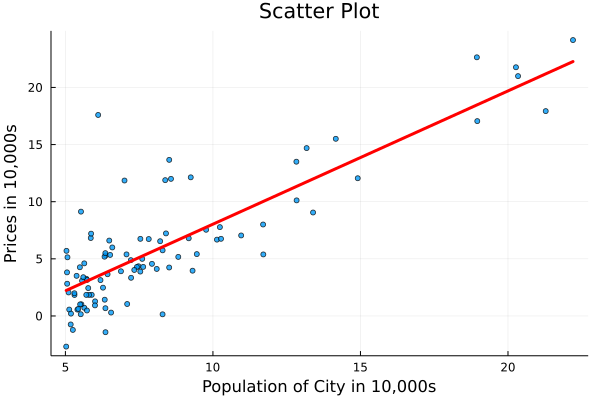

In [42]:
x = C.population
y = C.profit
optimizedTheta = result[iterations][2]
gr()
Plots.plot(x, y, seriestype = :scatter, title = "Scatter Plot", markersize=3,
        alpha=.8,
        legend=false, 
        xlabel="Population of City in 10,000s",
        ylabel="Prices in 10,000s")
Plots.plot!(x,X*optimizedTheta,linewidth=3, color=:red)

In [43]:
#Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 8.5781]' * optimizedTheta

6.374881438009295

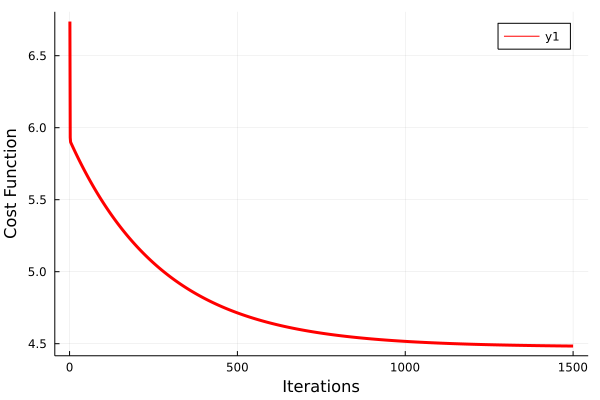

In [44]:
Plots.plot(getindex.(result, 1), getindex.(result, 3), linewidth=3, color=:red, 
        xlabel="Iterations",
        ylabel="Cost Function")

In [45]:
using WebIO
node(:p, "Hello, Jupyter")

(p
  "Hello, Jupyter")

In [46]:
x = C.population
y = C.profit

m = length(y)
x1 = ones(m, 1)
X = hcat(x1, x);

function CostFunction(X, y, theta)
    JTheta = (1 / (2 * m)) * (sum((X * theta - y) .^ 2))
    return JTheta
end


theta0s = range(-10, 10, step=1)
theta1s = range(-1, 4, step=0.25)
costtheta = []

for i in theta0s
    for j in theta1s
        theta = [i, j]
        push!(costtheta, CostFunction(X, y, theta))
    end
end

axis_length = length(theta0s)
cost_function_matrix = reshape(costtheta, (axis_length, axis_length))


21×21 Matrix{Any}:
 328.093    304.594    282.095    260.596    …   58.1121   52.6131   48.1142
 273.554    252.095    231.636    212.177        40.2923   36.8334   34.3744
 224.103    204.684    186.265    168.846        27.5604   26.1413   25.7223
 179.74     162.361    145.981    130.602        19.9161   20.5371   22.158
 140.464    125.125    110.786     97.4467       17.3597   20.0205   23.6814
 106.276     92.9771    80.6779    69.3787   …   19.8909   24.5917   30.2925
  77.1762    65.9169    55.6577    46.3984       27.5099   34.2507   41.9915
  53.1638    43.9445    35.7252    28.506        40.2167   48.9974   58.7781
  34.2392    27.0599    20.8805    15.7012       58.0112   68.8318   80.6525
  20.4024    15.263     11.1236     7.9842       80.8934   93.754   107.615
  11.6532     8.55381    6.45438    5.35494  …  108.863   123.764   139.665
   7.99188    6.9324     6.87291    7.81343     141.921   158.862   176.802
   9.41827   10.3987    12.3792    15.3597      180.067   199

In [47]:
layout = Layout(
    title="Cost Function", autosize=false,
    width=500, height=500,
    margin=attr(l=65, r=50, b=65, t=90)
)


PlotlyJS.plot(PlotlyJS.surface(z=cost_function_matrix, x=theta0s, y=theta1s,
    contours_z=attr(
        show=true,
        usecolormap=true,
        highlightcolor="limegreen",
        project_z=true
    )),
    layout)

data: [
  "surface with fields contours, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, template, title, and width"

In [48]:
using PlotlyJS

PlotlyJS.plot(PlotlyJS.contour(
    x=theta0s, 
    y=theta1s,
    z=cost_function_matrix
))

data: [
  "contour with fields transpose, type, x, y, and z"
]

layout: "layout with fields margin and template"

In [49]:
# Normal equa2on: Method to solve for Theta analytically.

XTranspose = X'
XTranposeX = XTranspose * X
XTranposeXInv = inv(XTranposeX)
Theta = (XTranposeXInv * XTranspose) * y


2-element Vector{Float64}:
 -3.895780878311886
  1.1930336441895961

In [50]:
#How to use reshape in Julia

#reshape([],0,2)
#BX = Vector(1:16)
#reshape(BX, (4, 4))
#reshape(BX, 2, :)
#reshape(1:6, 2, 3)
#LX = [1  2  3  4; 5  6  7  8; 9  10  11  12; 13  14  15  16];
#reshape(LX, (4, 4))
#NX = [1  5   9  13; 2  6  10  14; 3  7  11  15; 4  8  12  16];
#(reshape(NX, 2, :))

BX = Vector(1:16)
reshape(BX, (4, 4))

4×4 Matrix{Int64}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16